# SPARK FOUNDATION INTERNSHIP

# TASK 1: 
## Predict the percentage of an student based on the number of study hours.

## Importing Libraries

In [2]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns
% matpllotlib inline

UsageError: Line magic function `%` not found.


## Import the Data

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
data.isna().sum() # finding the count of missing values from different columns

Hours     0
Scores    0
dtype: int64

In [8]:
data.shape #dataframe shape

(25, 2)

In [9]:
x = data['Hours']
y = data['Scores']

## Data Visualization

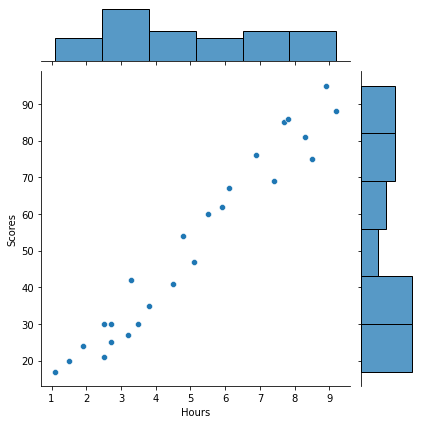

In [10]:
sns.jointplot(x = x, y = y)

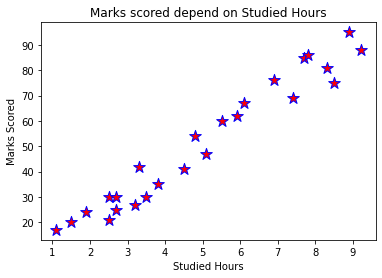

In [11]:
# showcasing the relationship between the column and the label
data.plot.scatter(x = 'Hours', y = 'Scores', s = 150, marker = '*', color = 'red', edgecolors = 'blue')
plt.xlabel('Studied Hours')
plt.ylabel('Marks Scored')
plt.title('Marks scored depend on Studied Hours')
plt.show()

## Data splitting 

In [12]:
# dropping the 'Chance of Admit' and 'serial number' as they are not going to be used as features for prediction
x=data.drop(['Scores'],axis=1) 
# 'Chance of Admit' is the target column which shows the probability of admission for a candidate  
y=data['Scores']

In [13]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


## Making prediction by using Scikit-Learn 

In [14]:
# splitting the data into training and testing sets
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33, random_state=100)

In [15]:
# fitting the date to the Linear regression model
reg = linear_model.LinearRegression()
reg.fit(train_x, train_y)

LinearRegression()

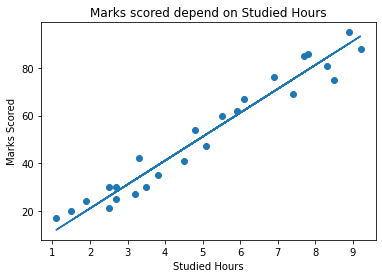

In [16]:
# showcasing the relationship between the column and the label
coefficient = reg.coef_
intercept = reg.intercept_
plt.xlabel('Studied Hours')
plt.ylabel('Marks Scored')
plt.title('Marks scored depend on Studied Hours')
line = (data['Hours'].values * coefficient) + intercept
plt.scatter(data.Hours, data.Scores)
plt.plot(data.Hours, line)
plt.show()

In [17]:
y_pred = reg.predict(test_x)
y_pred

array([28.01593698, 39.06838258, 34.04454367, 60.16850601, 15.95872359,
       75.24002275, 70.21618384, 49.11606041, 93.32584283])

## Comparison

In [18]:
df = pd.DataFrame({'Actual': test_y,'Predicted': y_pred})
df

,Actual,Predicted
9,25,28.015937
22,35,39.068383
13,42,34.044544
11,62,60.168506
5,20,15.958724
19,69,75.240023
23,76,70.216184
21,54,49.116060
6,88,93.325843


In [19]:
# to see the parameters of train dataset

print("Coeff:     ",reg.coef_)     # coeff. of X(train) variable
print("Intercept: ",reg.intercept_)  # constant (c)

Coeff:      [10.04767782]
Intercept:  0.8872068539897171


## Model Evaluation

In [20]:
print('MSE:', mean_squared_error(test_y,y_pred))

MSE: 25.914562718200436


In [21]:
print('RMSE:', np.sqrt(mean_squared_error(test_y,y_pred)))

RMSE: 5.09063480503173


In [22]:
print('MAE:', mean_absolute_error(test_y,y_pred))

MAE: 4.794018624738147


## Accuracy

In [23]:
# calculataing the accuracy of the model
score= r2_score(reg.predict(test_x),test_y)
print("Test set score: {}".format(score))

Test set score: 0.9535186015924711


# Predicting Score for 9.25 study hours

In [24]:
study_hours = 9.25
score_pred = reg.predict([[9.25]])
print("Number of hours = {}".format(study_hours))
print("Predicted scores = {}".format(score_pred[0]))

Number of hours = 9.25
Predicted scores = 93.82822672378322
